# **Import Libraries and modules**

In [1]:
# Install and Import Keras
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Importing the required libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
# Load MNIST into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [56]:
# Connecting Drive to save models
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


(60000, 28, 28)


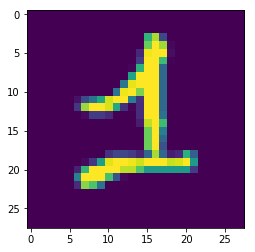

In [7]:
# Looking at sample images
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[24])

In [0]:
# Defining shape of the sets
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Scaling down pixel values from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
# Inspecting labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [15]:
# Inspectingt the categorized labels
Y_train[20:30]


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [49]:
# Building the infrastructure
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(26,26,1)))

model.add(MaxPooling2D(2, 2, input_shape = (24, 24, 1)))
model.add(Convolution2D(16, 1, 1, activation='relu', input_shape=(12,12,1)))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(12,12,1)))

model.add(MaxPooling2D(2, 2, input_shape = (10, 10, 1)))
model.add(Convolution2D(16, 1, 1, activation='relu', input_shape=(5,5,1)))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(5,5,1)))

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(3,3,1)))
#model.add(Convolution2D(10, 2, 2, activation='relu', input_shape=(2,2,1)))

#model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(8,8,1)))

model.add(Flatten())
model.add(Dense(10, input_dim=10))
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(26, 26, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu", input_shape=(12, 12, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(12, 12, 1...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), act

In [51]:
# Checking the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 12, 12, 16)        528       
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 5, 5, 16)          528       
__________

In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
#lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=10)
csv_logger = CSVLogger('/content/gdrive/My Drive/EVA/P3/Try2/mnist.csv')

filepath="/content/gdrive/My Drive/EVA/P3/Try2/epochs-{epoch:03d}-acc-{acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')

In [67]:
# Training the model
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, callbacks=[csv_logger, checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0385 - acc: 0.9880

Epoch 00001: acc improved from -inf to 0.98805, saving model to /content/gdrive/My Drive/EVA/P3/Try2/epochs-001-acc-0.988.hdf5
Epoch 2/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0335 - acc: 0.9896

Epoch 00002: acc improved from 0.98805 to 0.98958, saving model to /content/gdrive/My Drive/EVA/P3/Try2/epochs-002-acc-0.990.hdf5
Epoch 3/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0264 - acc: 0.9914

Epoch 00003: acc improved from 0.98958 to 0.99142, saving model to /content/gdrive/My Drive/EVA/P3/Try2/epochs-003-acc-0.991.hdf5
Epoch 4/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0238 - acc: 0.9921

Epoch 00004: acc improved from 0.99142 to 0.99213, saving model to /content/gdrive/My Drive/EVA/P3/Try2/epochs-004-acc-0.992.hdf5
Epoch 5/10
60000/60000 [==============================] - 11s 177us/ste

In [0]:
# Loading best model from the initial training
#model.load_weights("/content/gdrive/My Drive/EVA/P3/Try2/epochs-009-acc-0.996.hdf5")
model.load_weights("/content/gdrive/My Drive/EVA/P3/Try2/epochs-019-acc-0.998.hdf5")

In [77]:
# Continuing to train the model again and again
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, callbacks=[csv_logger, checkpoint])

Epoch 1/20
  896/60000 [..............................] - ETA: 11s - loss: 3.2370e-04 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 11s 176us/step - loss: 0.0072 - acc: 0.9977

Epoch 00001: acc did not improve from 0.99790
Epoch 2/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0063 - acc: 0.9980

Epoch 00002: acc improved from 0.99790 to 0.99803, saving model to /content/gdrive/My Drive/EVA/P3/Try2/epochs-002-acc-0.998.hdf5
Epoch 3/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0072 - acc: 0.9975

Epoch 00003: acc did not improve from 0.99803
Epoch 4/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.0081 - acc: 0.9975

Epoch 00004: acc did not improve from 0.99803
Epoch 5/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0074 - acc: 0.9976

Epoch 00005: acc did not improve from 0.99803
Epoch 6/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.0056 - acc: 0.9982

Epoch 00006: acc improved from 0.99803 to 0.99817, saving model to /content/gdr

In [0]:
# Evaluating the model on the test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [79]:
# Printing test score
print(score)

[0.05155126029718833, 0.9915]


In [0]:
# Running the model on test data
y_pred = model.predict(X_test)

In [82]:
# Printing values of predictions vs actual labels in test
print(y_pred[:9])
print(y_test[:9])

[[1.3884860e-20 4.6642823e-19 1.7832854e-14 4.3665459e-15 1.0737637e-24
  5.7174253e-23 2.9551734e-37 1.0000000e+00 7.6392620e-25 3.8623131e-20]
 [1.4812282e-23 7.4469110e-26 1.0000000e+00 7.2951566e-20 3.6447465e-27
  3.0650028e-30 1.6514207e-31 8.2026688e-19 3.8172756e-18 1.3142316e-27]
 [4.9963056e-17 1.0000000e+00 2.5534362e-13 2.5630941e-12 3.2551731e-13
  7.2420840e-13 8.2142062e-12 2.6521042e-11 1.0832510e-09 9.1134730e-17]
 [1.0000000e+00 1.2619311e-15 4.4466209e-17 8.2553667e-21 4.8205323e-21
  2.3088598e-15 9.1809459e-12 2.4238072e-19 7.7634773e-16 5.4313064e-13]
 [7.7643086e-23 1.5776501e-15 9.5731153e-19 9.7692984e-20 1.0000000e+00
  1.8453587e-17 1.3970368e-17 1.8125533e-18 2.4439796e-14 7.2392283e-12]
 [4.6047945e-18 1.0000000e+00 1.4634009e-13 1.4574260e-13 6.4439952e-13
  8.1101838e-15 1.7599798e-14 2.2082380e-10 2.2505239e-11 2.3475272e-16]
 [2.9430042e-35 8.2932118e-21 4.7882349e-23 2.6043974e-33 1.0000000e+00
  5.6108353e-25 1.8948845e-27 1.4368193e-20 5.5343163e-15 

In [0]:
# Creating a dictionary of layers
layer_dict = dict([(layer.name, layer) for layer in model.layers])

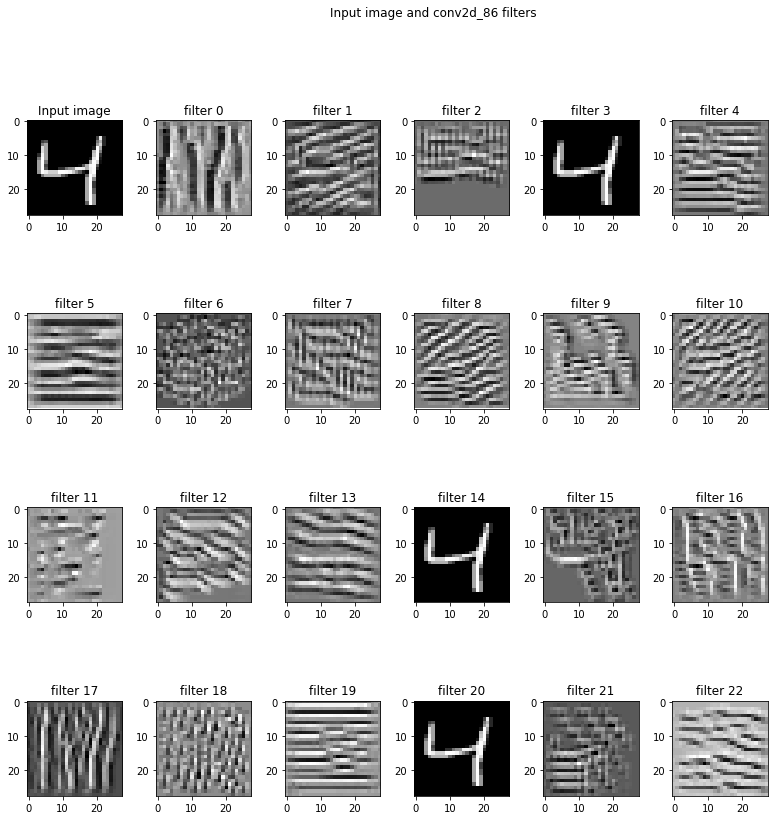

In [87]:
# Visualizing the layers
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_86'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()